# The `dataset` Module

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
datasets.*?

In [3]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
X, y = boston.data, boston.target

# Creating Sample Data

In [5]:
datasets.make_*?

In [6]:
X, y = datasets.make_regression(n_samples=1000, n_features=1,
                                n_informative=1, noise=15,
                                bias=1000, random_state=0)

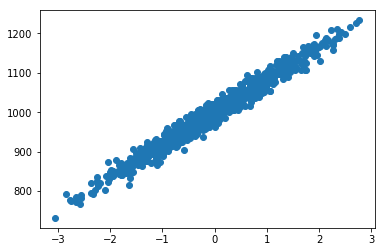

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

In [12]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                           cluster_std=0.6, random_state=0)

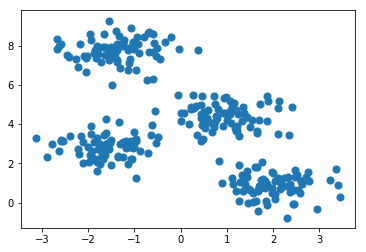

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=50);

# Scaling Data

In [56]:
from sklearn import preprocessing

X, y = boston.data, boston.target
X[:, :3].mean(axis=0)

array([  3.59376071,  11.36363636,  11.13677866])

In [36]:
X[:, :3].std(axis=0)

array([  8.58828355,  23.29939569,   6.85357058])

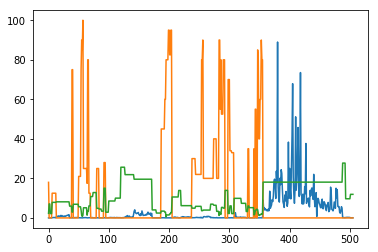

In [37]:
plt.plot(X[:, :3]);

### `preprocessing.scale`

`scale` centers and scales the data using the following formula:
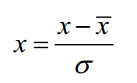

In [38]:
X_2 = preprocessing.scale(X[:, :3])

In [39]:
X_2.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [40]:
X_2.std(axis=0)

array([ 1.,  1.,  1.])

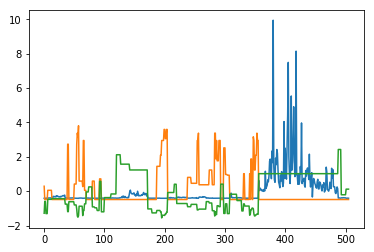

In [42]:
plt.plot(X_2);

### `StandardScaler`

Same as `preprocessing.scale` but persists scale settings across uses.

In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X[:, :3])
X_3 = scaler.transform(X[:, :3])
X_3.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [48]:
X_3.std(axis=0)

array([ 1.,  1.,  1.])

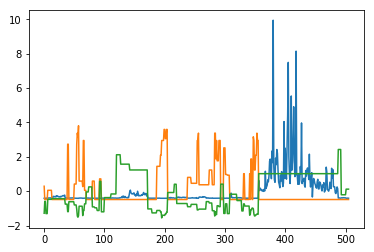

In [49]:
plt.plot(X_3);

### `MinMaxScaler`

Scales data within a specified range.

In [50]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X[:, :3])
X_4 = scaler.transform(X[:, :3])
X_4.max(axis=0)

array([ 1.,  1.,  1.])

In [51]:
X_4.std(axis=0)

array([ 0.09653024,  0.23299396,  0.25123059])

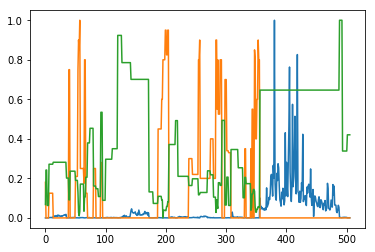

In [52]:
plt.plot(X_4);

In [53]:
scaler = preprocessing.MinMaxScaler(feature_range=(-4, 4))
scaler.fit(X[:, :3])
X_5 = scaler.transform(X[:, :3])

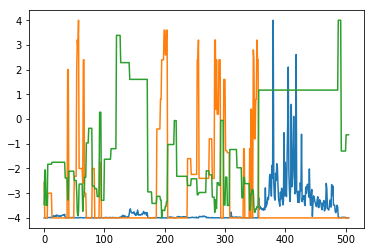

In [54]:
plt.plot(X_5);

# Binarizing Data

### `preprocessing.binarize`

In [62]:
new_target = preprocessing.binarize(boston.target, threshold=boston.target.mean())
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

In [59]:
(boston.target[:5] > boston.target.mean()).astype(int)

array([1, 0, 1, 1, 1])

### `Binarizer`

In [65]:
bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform(boston.target)
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

# Working with Categorical Variables

### `OneHotEncoder`

In [62]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [63]:
d = np.column_stack((X, y))

In [64]:
encoder = preprocessing.OneHotEncoder()
encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### `DictVectorizer`

In [70]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
dict = [{'species': iris.target_names[i]} for i in y]
dv.fit_transform(dict).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### Patsy

In [71]:
import patsy
patsy.dmatrix('0 + C(species)', {'species': iris.target})

DesignMatrix with shape (150, 3)
  C(species)[0]  C(species)[1]  C(species)[2]
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
 

# Binarizing Label Features

### `LabelBinarizer`

In [73]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
new_target = binarizer.fit_transform(y)
y.shape, new_target.shape

((150,), (150, 3))

In [74]:
new_target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [75]:
new_target[-5:]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [76]:
binarizer.classes_

array([0, 1, 2])

### `LabelBinarizer` and labels

In [77]:
binarizer = LabelBinarizer(neg_label=-1000, pos_label=1000)
binarizer.fit_transform(y)[:5]

array([[ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000]])

# Inputing Missing Values through Various Strategies

In [66]:
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, .25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

In [67]:
masking_array[:5]

array([[ True, False, False, False],
       [False,  True,  True, False],
       [False, False,  True,  True],
       [False, False, False, False],
       [False,  True,  True, False]], dtype=bool)

In [68]:
iris_X[:5]

array([[ nan,  3.5,  1.4,  0.2],
       [ 4.9,  nan,  nan,  0.2],
       [ 4.7,  3.2,  nan,  nan],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  nan,  nan,  0.2]])

By default, Imputer fills in missing values with the mean.

In [69]:
impute = preprocessing.Imputer()
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.78962264,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.05      ,  3.91214953,  0.2       ],
       [ 4.7       ,  3.2       ,  3.91214953,  1.19304348],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.05      ,  3.91214953,  0.2       ]])

In [70]:
impute = preprocessing.Imputer(strategy='median')
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.7,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  4.5,  0.2],
       [ 4.7,  3.2,  4.5,  1.3],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3. ,  4.5,  0.2]])

In [71]:
iris_X[np.isnan(iris_X)] = -1
iris_X[:5]

array([[-1. ,  3.5,  1.4,  0.2],
       [ 4.9, -1. , -1. ,  0.2],
       [ 4.7,  3.2, -1. , -1. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. , -1. , -1. ,  0.2]])

In [72]:
impute = preprocessing.Imputer(missing_values=-1)
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.78962264,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.05      ,  3.91214953,  0.2       ],
       [ 4.7       ,  3.2       ,  3.91214953,  1.19304348],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.05      ,  3.91214953,  0.2       ]])